<center><h1>Songs Data Cleaning</h1></center>

The goal of this notebook is to prepare the songs dataset for the creation of a machine learning model. To achieve this goal, a data cleaning process will be performed that will address the problems identified in the exploratory data analysis notebook (songs_data_analysis.ipynb). This cleaning process will be based on the detection and correction of null values, outliers, errors, and duplicates.

After completing the cleaning process, a second exploratory data analysis will be performed to verify that the problems identified in the first analysis have been resolved. This second exploratory data analysis will be used to validate the cleaned data and detect any additional problems that may have arisen during the cleaning process. The cleaning process is divided into several stages, including:

- Handling duplicates
- Handling missing values 
- Handling outliers
- Data formatting and type conversion
- EDA

In [11]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
from sklearn.impute import KNNImputer
from scipy.stats import mstats
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Read data
url = "https://drive.google.com/file/d/1ULYDYzryDnJxuOgJ8rq0JtDCnTLS5Pri/view?usp=share_link"
file_id = url.split('/')[-2]
dwn_url = "https://drive.google.com/uc?id=" + file_id
output = "songs_df.csv"
songs_df = pd.read_csv("songs_df.csv")

# Handling duplicates

In [13]:
# Drop duplicates based on both the "name" and "artists" columns.
songs_df = songs_df.drop_duplicates(subset = ['name', 'artists'], keep = 'first').reset_index(drop = True)

In [14]:
# Check duplicates based on both the "name" and "artists" columns.
songs_df[['name', 'artists']].duplicated().sum()

0

# Handling missing values 

In [16]:
# Imputation with algorithm KNN

cols_to_impute = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

X = songs_df[cols_to_impute]

X_known = X[X.notnull().all(axis=1)]
X_unknown = X[X.isnull().any(axis=1)]

imputer = KNNImputer(n_neighbors=5)
imputer.fit(X_known)

X_imputed = pd.DataFrame(imputer.transform(X_unknown), columns=cols_to_impute, index=X_unknown.index)

songs_df.loc[X_imputed.index, cols_to_impute] = X_imputed

In [17]:
# Check missing values
songs_df.isnull().sum()

id                  0
name                1
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [18]:
#Removing songs without name
songs_df.dropna(subset=['name'], inplace=True)

In [19]:
# Check 
songs_df['name'].isnull().sum()

0

# Handling outliers

The winsorization technique is a data preprocessing technique used to deal with outliers in a data set. This technique is based on replacing outliers with values that are at the p percentile or (100th - p) percentile of the data, where p is a value that is set in advance.

For example, if p is set to 5, the winsorization technique will replace all values above the 95th percentile with the value at the 95th percentile, and all values below the 5th percentile with the value at the 5th percentile. In this way, the effect of outliers in the statistical analysis is reduced.

In [20]:
quantitative_columns = ["popularity", "duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence",
                         "tempo", "time_signature"]

In [21]:
for col in quantitative_columns:
    winsorized_followers = mstats.winsorize(songs_df[col], limits=[0.05, 0.05])
    songs_df[col] = winsorized_followers

In [22]:
# Check outliers
def count_outliers(df, col):
    """
    Returns the number of outliers in a column of a DataFrame using the Tukey's method.
    
    Parameters:
    -----------
    df (pandas.DataFrame): Input DataFrame.
    col (str): Name of the column to be analyzed.
        
    Returns:
    --------
    count (int): Number of outliers in the specified column.
        
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    count = ((df[col] > upper_bound) | (df[col] < lower_bound)).sum()
    
    return count

In [23]:
for col in quantitative_columns:
    print("Number of outliers in the", col, "column:", count_outliers(songs_df, col))

Number of outliers in the popularity column: 0
Number of outliers in the duration_ms column: 0
Number of outliers in the danceability column: 0
Number of outliers in the energy column: 0
Number of outliers in the key column: 0
Number of outliers in the loudness column: 0
Number of outliers in the mode column: 0
Number of outliers in the speechiness column: 75129
Number of outliers in the acousticness column: 0
Number of outliers in the instrumentalness column: 114970
Number of outliers in the liveness column: 36152
Number of outliers in the valence column: 0
Number of outliers in the tempo column: 0
Number of outliers in the time_signature column: 71178


# Data formatting and type conversion

In [24]:
# Column values are converted to agree with the Data dictionary
songs_df = songs_df.astype({"id":str, "name":str, "popularity":int, "duration_ms":int, "explicit":bool, "artists":str, "id_artists":str,
                            "release_date":str, "danceability":float, "energy":float, "key":int, "loudness":float, "mode":int,
                            "speechiness":float, "acousticness":float, "instrumentalness": float, "liveness":float,
                            "valence":float, "tempo":float, "time_signature":int}, errors='ignore')


In [25]:
# Check columns and data types
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526609 entries, 0 to 526609
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                526609 non-null  object 
 1   name              526609 non-null  object 
 2   popularity        526609 non-null  int32  
 3   duration_ms       526609 non-null  int32  
 4   explicit          526609 non-null  bool   
 5   artists           526609 non-null  object 
 6   id_artists        526609 non-null  object 
 7   release_date      526609 non-null  object 
 8   danceability      526609 non-null  float64
 9   energy            526609 non-null  float64
 10  key               526609 non-null  int32  
 11  loudness          526609 non-null  float64
 12  mode              526609 non-null  int32  
 13  speechiness       526609 non-null  float64
 14  acousticness      526609 non-null  float64
 15  instrumentalness  526609 non-null  float64
 16  liveness          52

# EDA

In [27]:
# Statistical summary
songs_df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,526609.000000,526609.00000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000
mean,27.126946,221699.46800,0.565468,0.541763,5.204214,-10.113599,0.637089,0.090160,0.452049,0.110086,0.207409,0.554331,118.251607,3.864837
std,17.215845,72226.94623,0.152392,0.240965,3.465710,4.400874,0.480840,0.110207,0.342721,0.255174,0.155523,0.248232,27.342282,0.341898
min,0.000000,95000.00000,0.269000,0.122000,0.000000,-19.815000,0.000000,0.027700,0.002030,0.000000,0.059660,0.124000,76.039000,3.000000
25%,13.000000,173720.00000,0.457000,0.348000,2.000000,-12.903000,0.000000,0.034300,0.109000,0.000000,0.099600,0.353000,96.027000,4.000000
50%,27.000000,214133.00000,0.578000,0.548000,5.000000,-9.338000,1.000000,0.045200,0.429000,0.000032,0.142000,0.564000,117.360000,4.000000
75%,40.000000,263573.00000,0.684000,0.740000,8.000000,-6.603000,1.000000,0.079600,0.777000,0.013400,0.278000,0.763000,135.985000,4.000000
max,59.000000,383640.00000,0.813000,0.928000,11.000000,-3.985000,1.000000,0.467000,0.982000,0.869000,0.645000,0.945000,173.689000,4.000000


In [28]:
# Histogram
def plot_histogram(df, col):
    """
    Generates a histogram of a specified column in a given DataFrame.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing the data.
    col (str): Name of the column to generate the histogram.
    
    Returns:
    None. The function displays the histogram plot.
    """
    plt.hist(df[col], bins=20, alpha=0.5)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

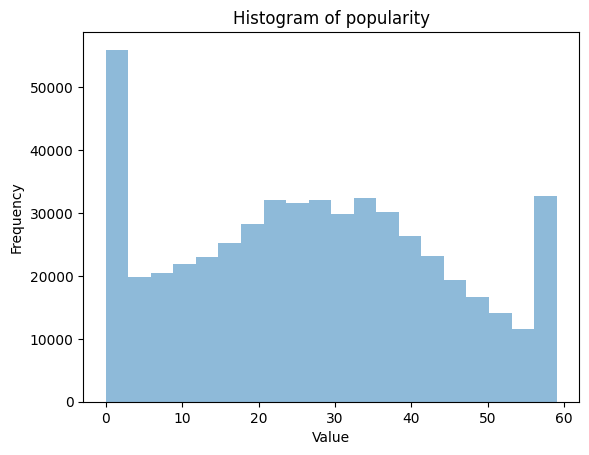

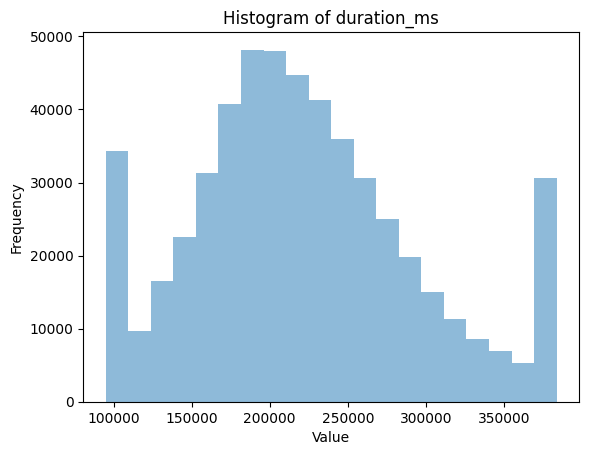

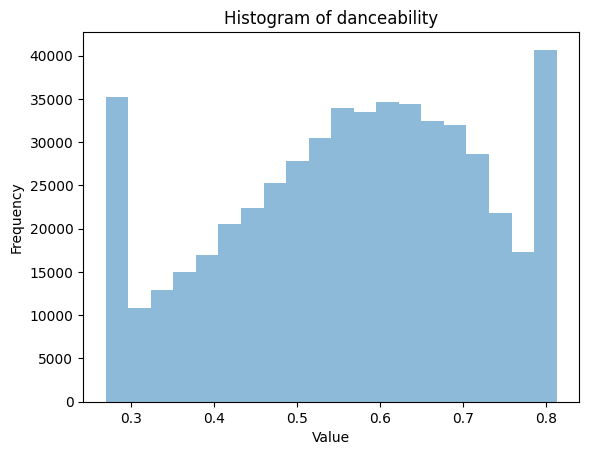

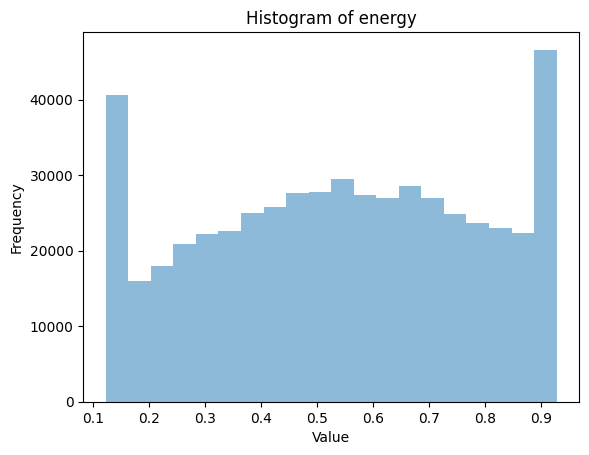

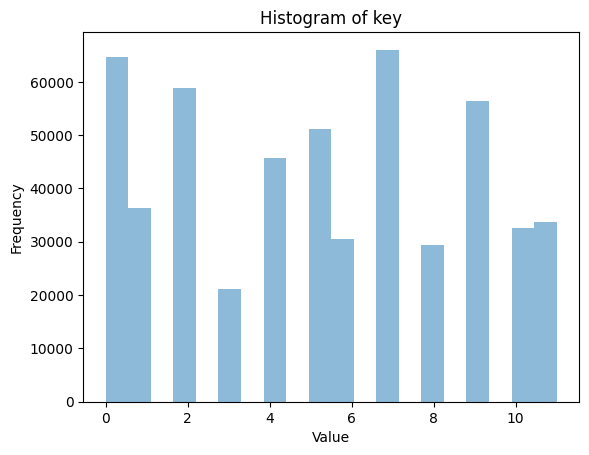

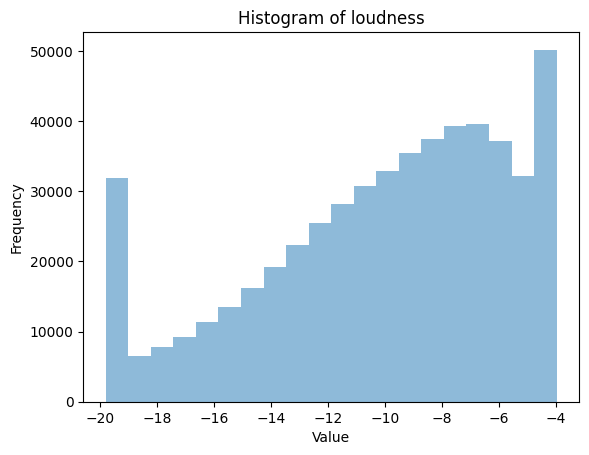

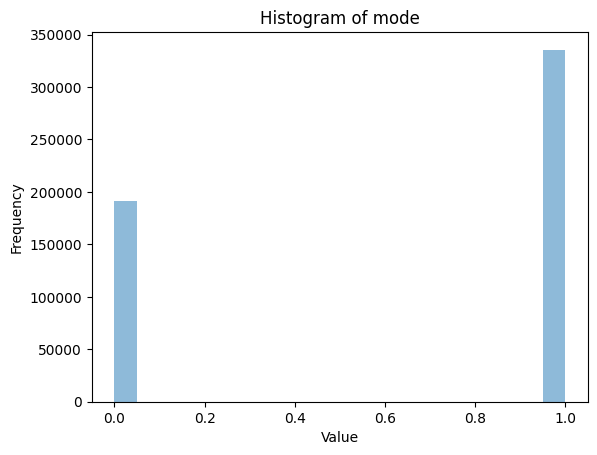

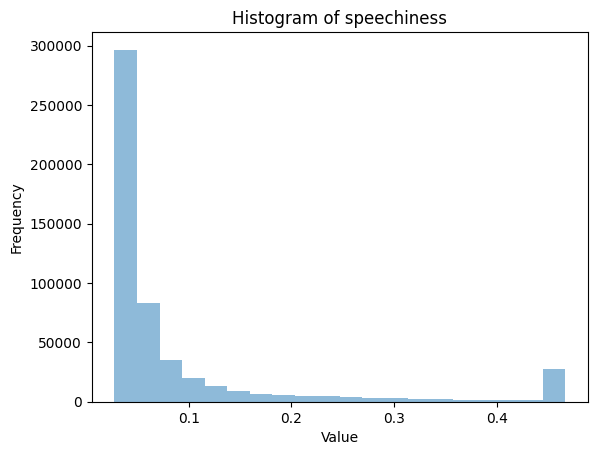

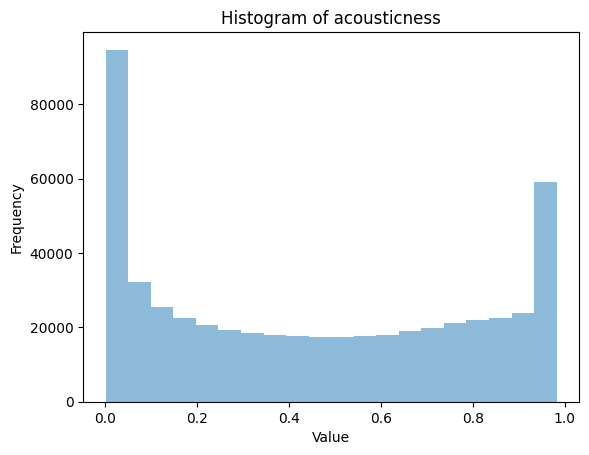

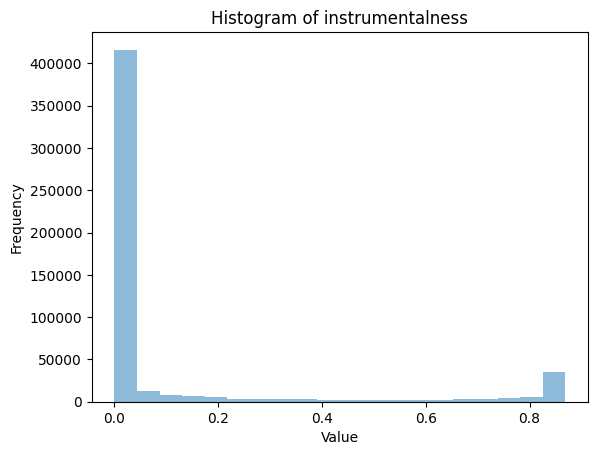

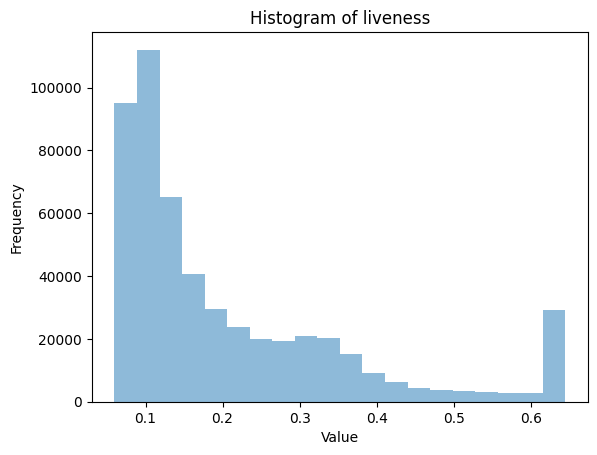

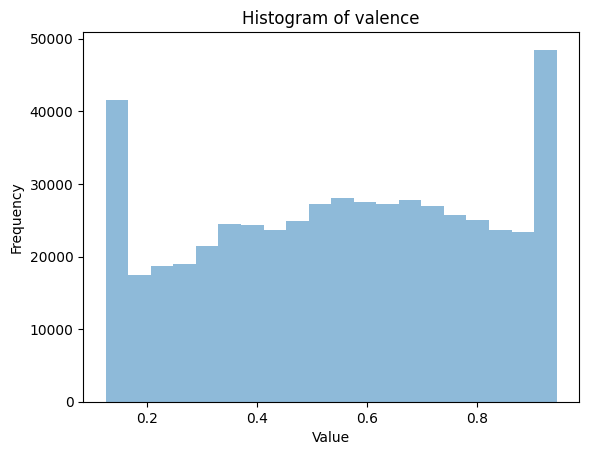

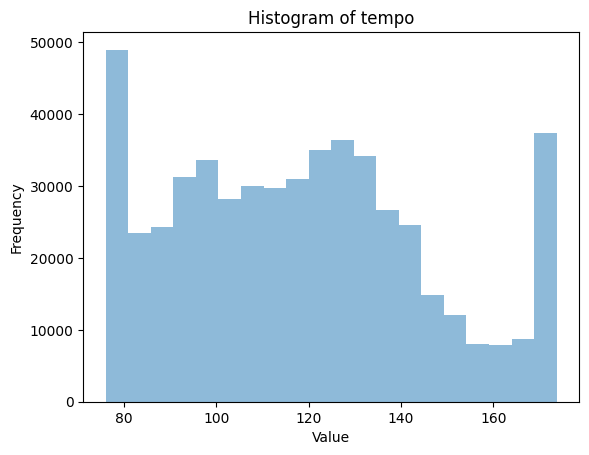

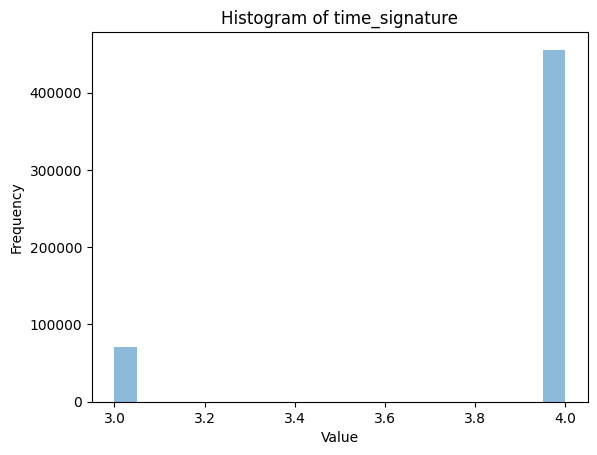

In [29]:
for col in quantitative_columns:
    plot_histogram(songs_df, col)

In [30]:
# Boxplot
def plot_boxplot(df, col):
    '''
    Creates a boxplot of a numeric variable in a pandas DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to be plotted.
    col (str): The name of the column in the DataFrame to be plotted.

    Returns:
    None
    '''
    plt.figure(figsize=(8,6))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

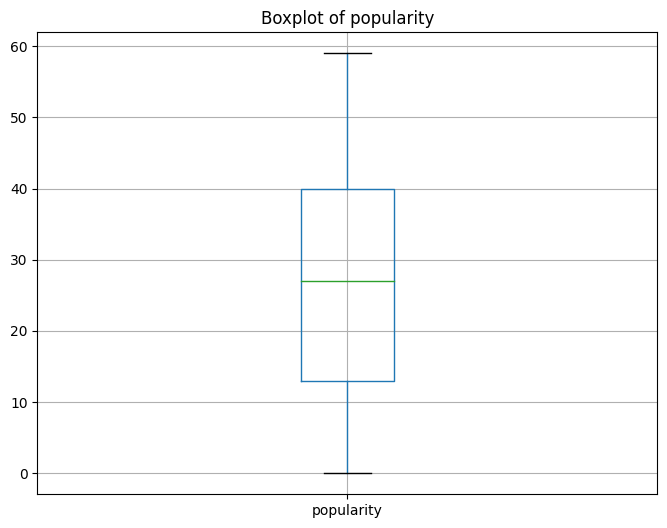

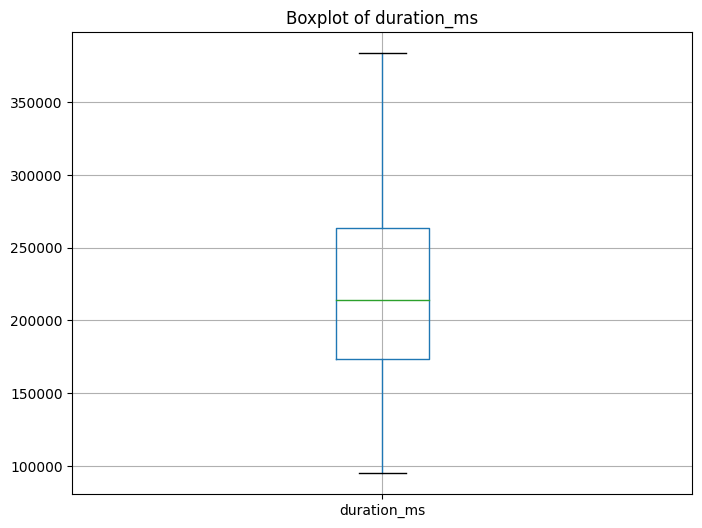

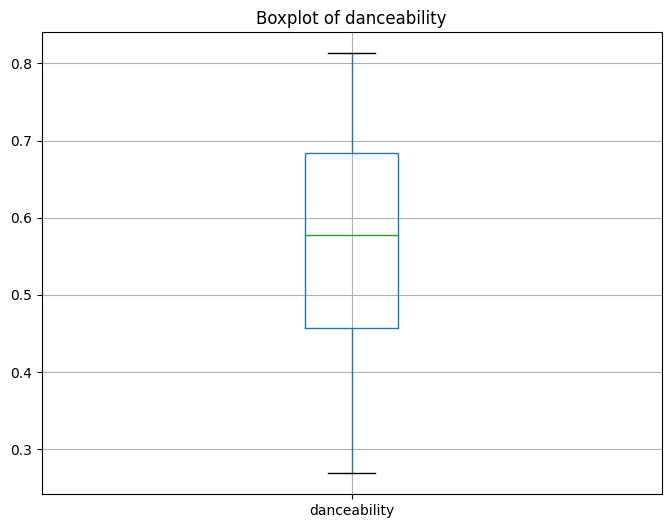

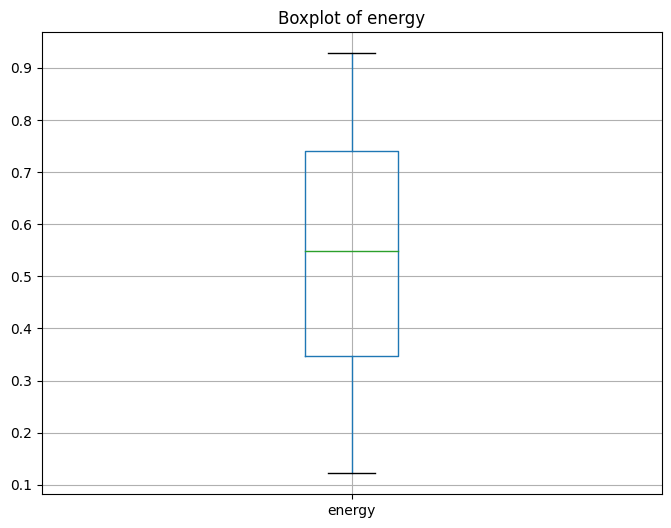

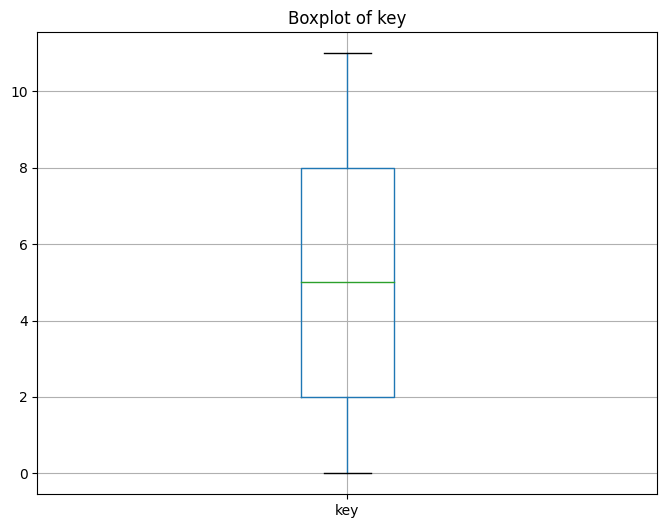

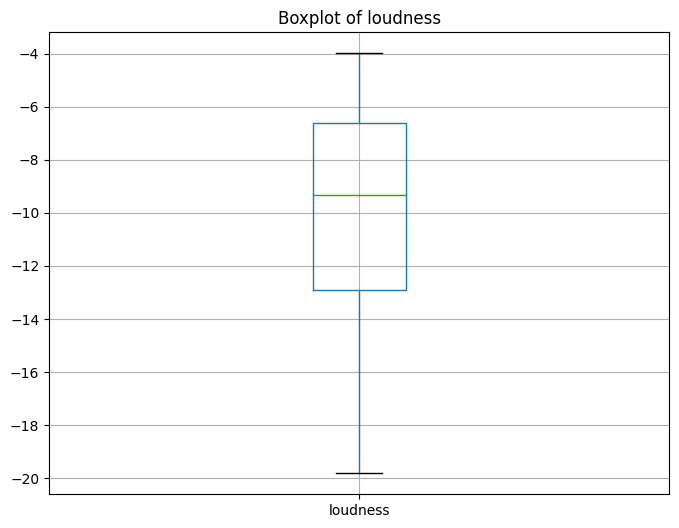

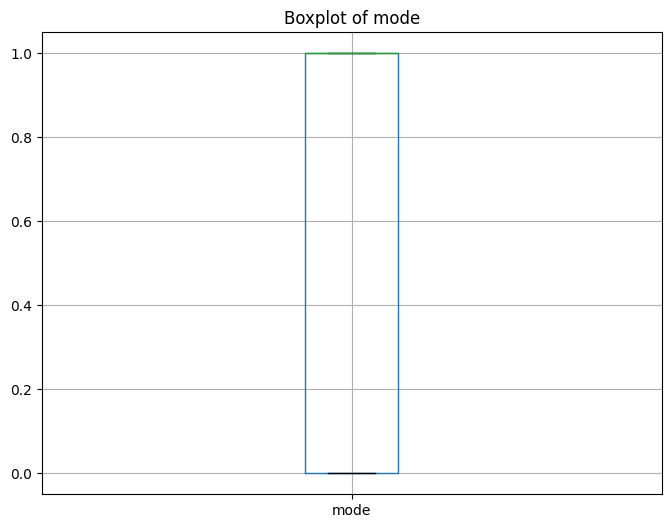

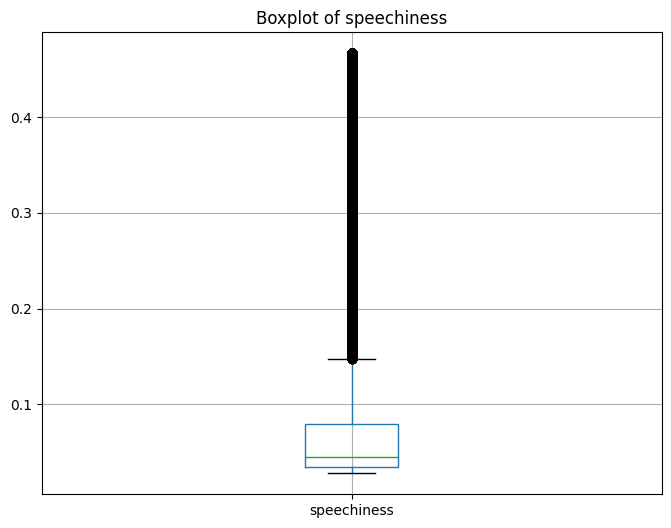

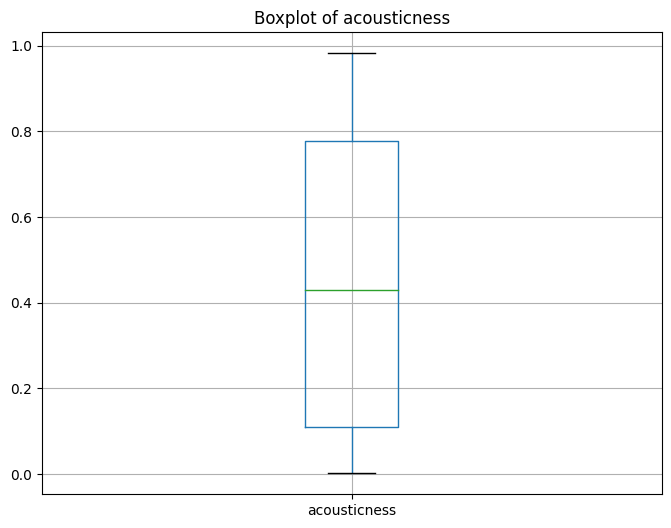

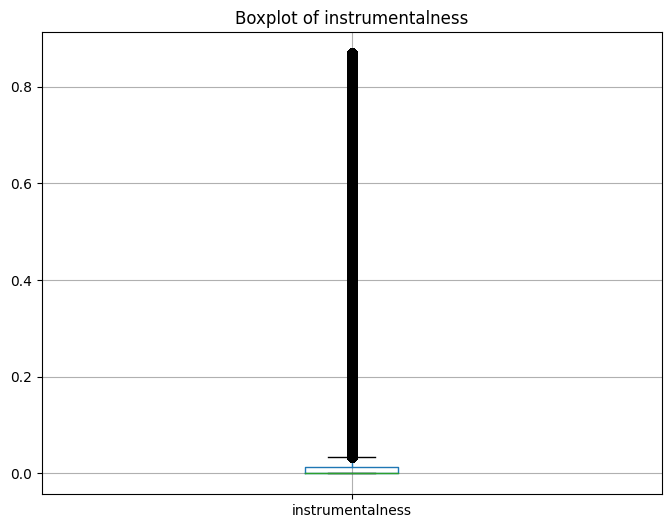

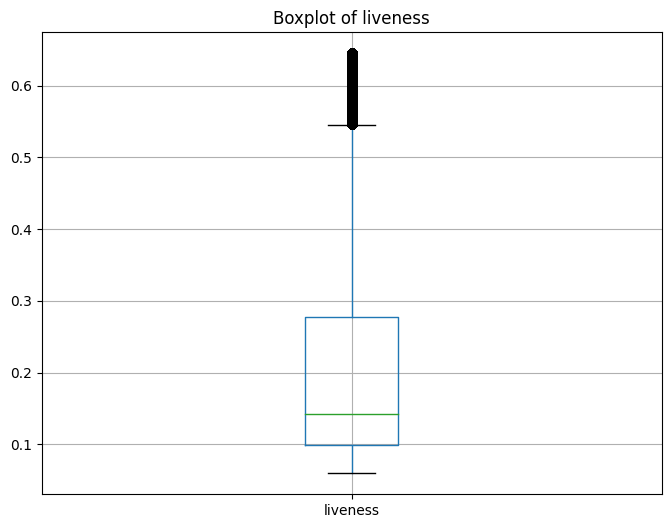

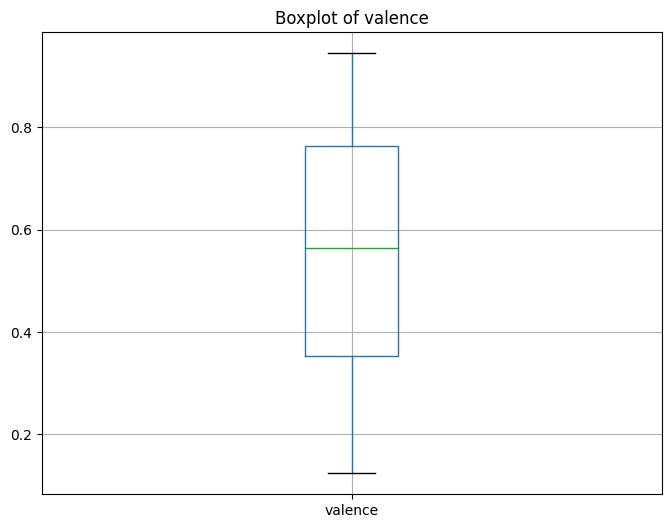

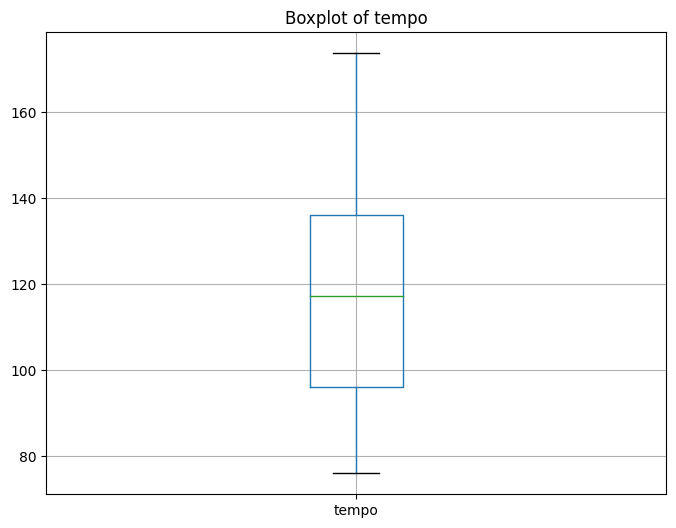

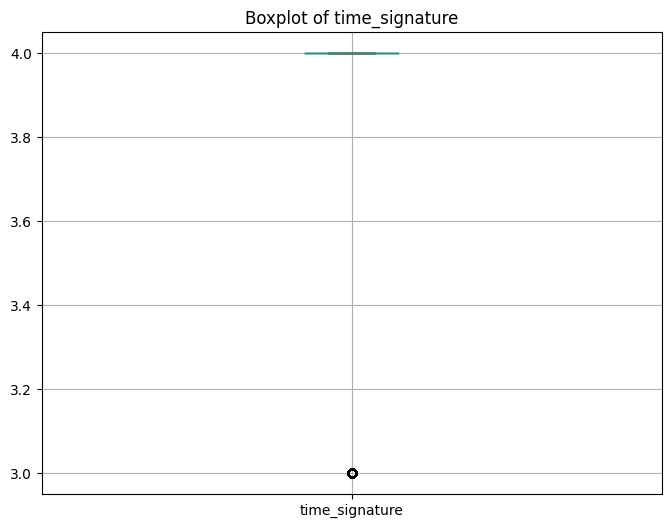

In [31]:
for col in quantitative_columns:
    plot_boxplot(songs_df, col)

<AxesSubplot: >

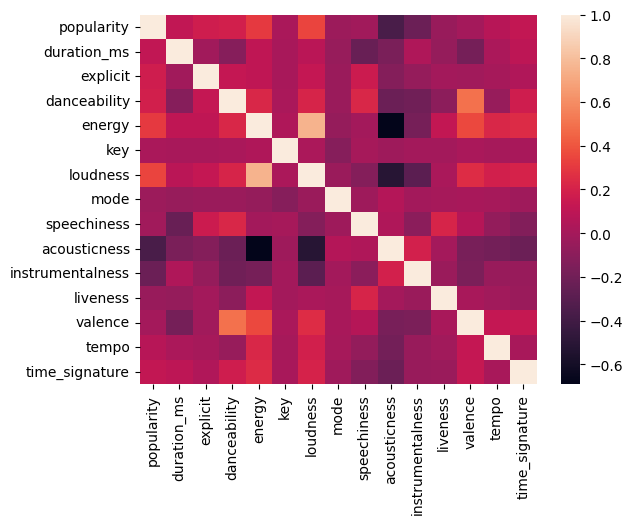

In [32]:
# Correlation heat map between variables
sns.heatmap(songs_df.corr(numeric_only=True))